This notebook intent is to analyze the properties of real networks.

Note that the datafile loaded in this notebook is located in a private bucket.

# Packages

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import random
from scipy.stats import pearsonr
import GRNgene as gg
import cma
import numpy as np
import pickle as pkl
from scipy.stats import ks_2samp
from scipy.optimize import curve_fit
import functions as f

In [12]:
# Make sure it installs in the correct environment !
#!pip install fsspec
#!pip install gcsfs

# Loading file

In [2]:
filepath = "../data/41598_2021_3625_MOESM5_ESM.xlsx"
file = pd.read_excel(filepath)

In [3]:
athaliana = (file["""Supplementary Table S1: Networks. A spreadsheet file with filtered networks"""].tolist()[2:], 
                       file["Unnamed: 1"].tolist()[2:], "Arabidopsis thaliana")  # noqa : E501
dmelanogaster = (file["Unnamed: 2"].tolist()[2:], 
                          file["Unnamed: 3"].tolist()[2:], "Drosophila Melanogaster")  # noqa : E501
ecoli = (file["Unnamed: 4"].tolist()[2:], 
                    file["Unnamed: 5"].tolist()[2:], "Escherichnia coli")  # noqa : E501
hsapiens = (file["Unnamed: 6"].tolist()[2:], 
               file["Unnamed: 7"].tolist()[2:], "Homo sapiens")  # noqa : E501
scerevisiae = (file["Unnamed: 8"].tolist()[2:], 
                           file["Unnamed: 9"].tolist()[2:], "Saccharomyces cerevisiae")  # noqa : E501

f.remove_nan_values(athaliana)
f.remove_nan_values(dmelanogaster)
f.remove_nan_values(ecoli)
f.remove_nan_values(hsapiens)
f.remove_nan_values(scerevisiae)

g_athaliana = f.create_graph(athaliana)
g_dmelanogaster = f.create_graph(dmelanogaster)
g_ecoli = f.create_graph(ecoli)
g_hsapiens = f.create_graph(hsapiens)
g_scerevisiae = f.create_graph(scerevisiae)

properties_athaliana = gg.network_properties(g_athaliana)
properties_dmelanogaster = gg.network_properties(g_dmelanogaster)
properties_ecoli = gg.network_properties(g_ecoli)
properties_hsapiens = gg.network_properties(g_hsapiens)
properties_scerevisiae = gg.network_properties(g_scerevisiae)

# Individual network analysis

## Arabidopsis Thaliana

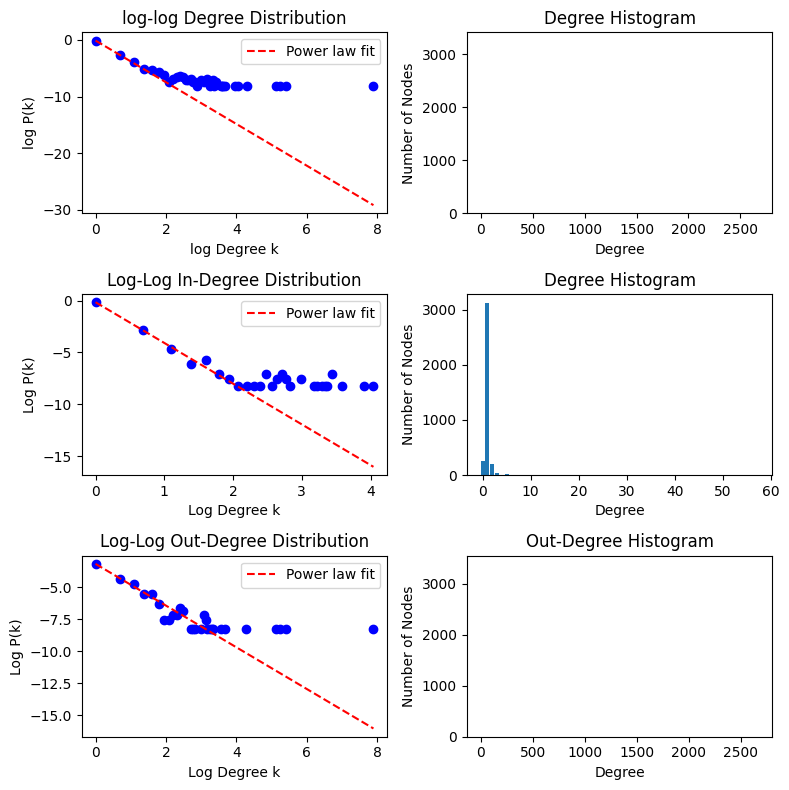

Fitted power law parameters: a = 0.04, b = -1.63


{'avg_clustering': 0.004792559098358698,
 'avg_degree': 2.3814684367380115,
 'degrees': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   20,   22,   24,   25,
          26,   27,   28,   29,   31,   35,   36,   37,   39,   52,   57,
          73,  167,  190,  221, 2674]),
 'density': 0.00032269220010000153,
 'degree_proba': array([8.79707396e-01, 6.69195340e-02, 1.86941208e-02, 6.23137361e-03,
        4.87672717e-03, 3.25115145e-03, 1.89650501e-03, 5.41858575e-04,
        1.08371715e-03, 1.35464644e-03, 1.62557572e-03, 1.35464644e-03,
        8.12787862e-04, 8.12787862e-04, 1.08371715e-03, 5.41858575e-04,
        5.41858575e-04, 2.70929287e-04, 8.12787862e-04, 5.41858575e-04,
        1.08371715e-03, 5.41858575e-04, 2.70929287e-04, 5.41858575e-04,
        8.12787862e-04, 2.70929287e-04, 5.41858575e-04, 2.70929287e-04,
        2.70929287e-04, 2.70929287e-04, 2.70929287e-04, 2.70929287e-04,
        2.70929287e-04,

In [15]:
f.plot_degrees(g_athaliana, plot_fit=True)
properties_athaliana

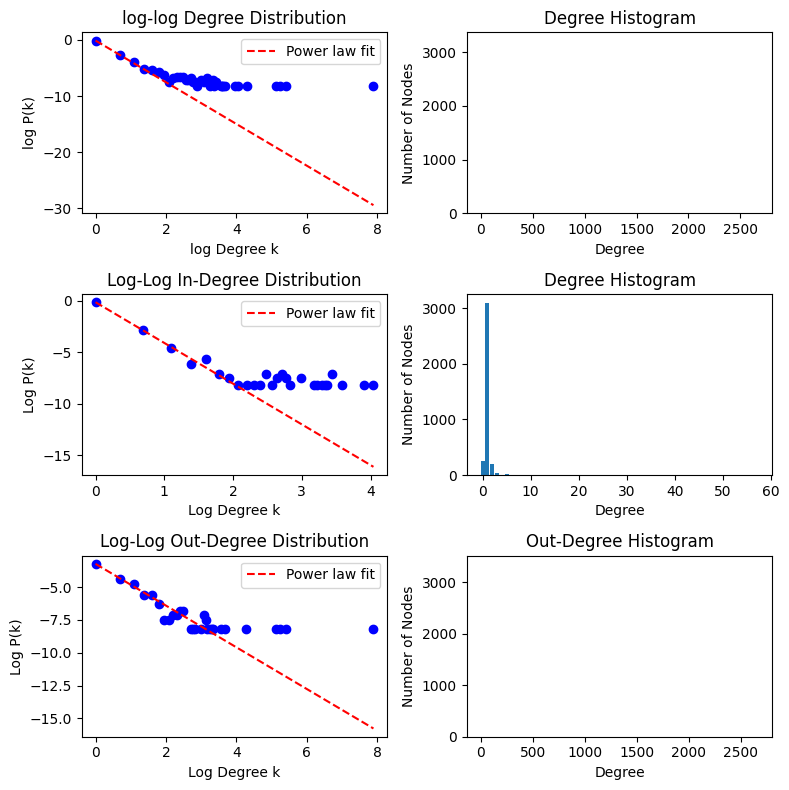

Fitted power law parameters: a = 0.04, b = -1.59


{'avg_clustering': 0.004861043042605648,
 'avg_degree': 2.3924154987633965,
 'degrees': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   20,   22,   24,   25,
          26,   27,   28,   29,   31,   35,   36,   37,   39,   52,   57,
          73,  167,  190,  221, 2674]),
 'density': 0.00032880916695483733,
 'degree_proba': array([8.81835669e-01, 6.54025831e-02, 1.86864523e-02, 5.77081616e-03,
        4.94641385e-03, 3.02280846e-03, 1.92360539e-03, 5.49601539e-04,
        1.09920308e-03, 1.37400385e-03, 1.37400385e-03, 1.37400385e-03,
        8.24402308e-04, 8.24402308e-04, 1.09920308e-03, 5.49601539e-04,
        5.49601539e-04, 2.74800769e-04, 8.24402308e-04, 5.49601539e-04,
        1.09920308e-03, 5.49601539e-04, 2.74800769e-04, 5.49601539e-04,
        8.24402308e-04, 2.74800769e-04, 5.49601539e-04, 2.74800769e-04,
        2.74800769e-04, 2.74800769e-04, 2.74800769e-04, 2.74800769e-04,
        2.74800769e-04,

In [16]:
g_largest_athaliana = f.get_largest_cc(g_athaliana)
f.plot_degrees(g_largest_athaliana, plot_fit=True)
properties_largest_athaliana = gg.network_properties(g_largest_athaliana)
properties_largest_athaliana

## Drosophila Melanogaster

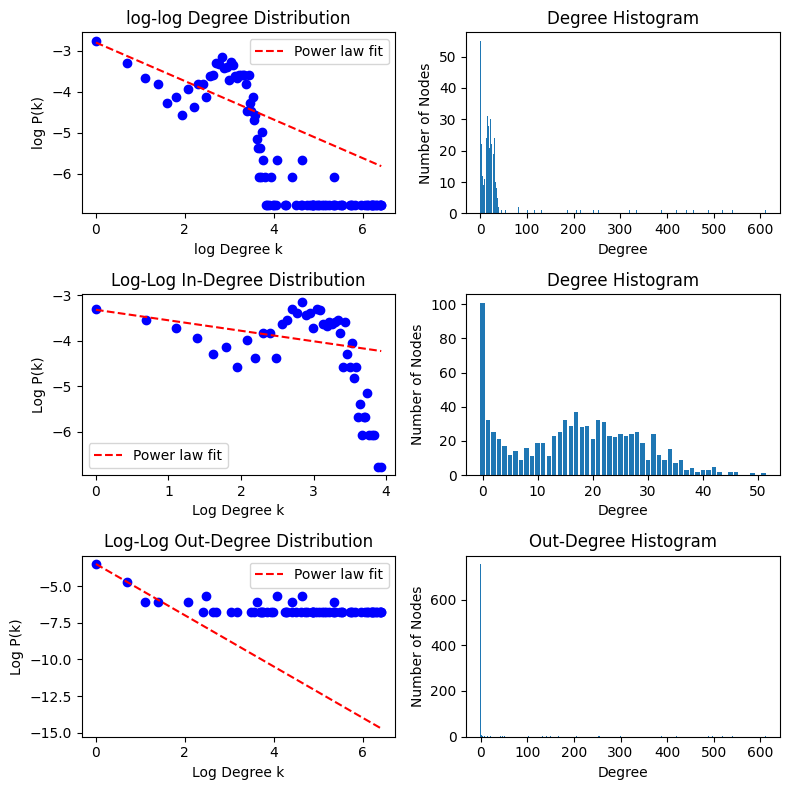

Fitted power law parameters: a = 0.03, b = -1.75


{'avg_clustering': 0.016035848109490807,
 'avg_degree': 33.03114186851211,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  45,  46,  47,  49,  51,  54,  55,  57,  59,
         70,  71,  82,  89, 101, 102, 103, 116, 124, 130, 131, 132, 133,
        141, 148, 150, 162, 167, 177, 187, 206, 209, 211, 215, 243, 253,
        255, 300, 310, 320, 335, 388, 420, 442, 457, 489, 497, 500, 509,
        519, 540, 558, 591, 599, 603, 611]),
 'density': 0.01907109807650815,
 'degree_proba': array([0.06343714, 0.03690888, 0.02537486, 0.02191465, 0.01384083,
        0.01614764, 0.01038062, 0.01960784, 0.01268743, 0.02191465,
        0.02191465, 0.01614764, 0.02652826, 0.02768166, 0.03690888,
        0.03575548, 0.04267589, 0.03229527, 0.03344867, 0.02422145,
        0.03806228, 0.03460208, 0.026

In [17]:
f.plot_degrees(g_dmelanogaster, plot_fit=True)
properties_dmelanogaster

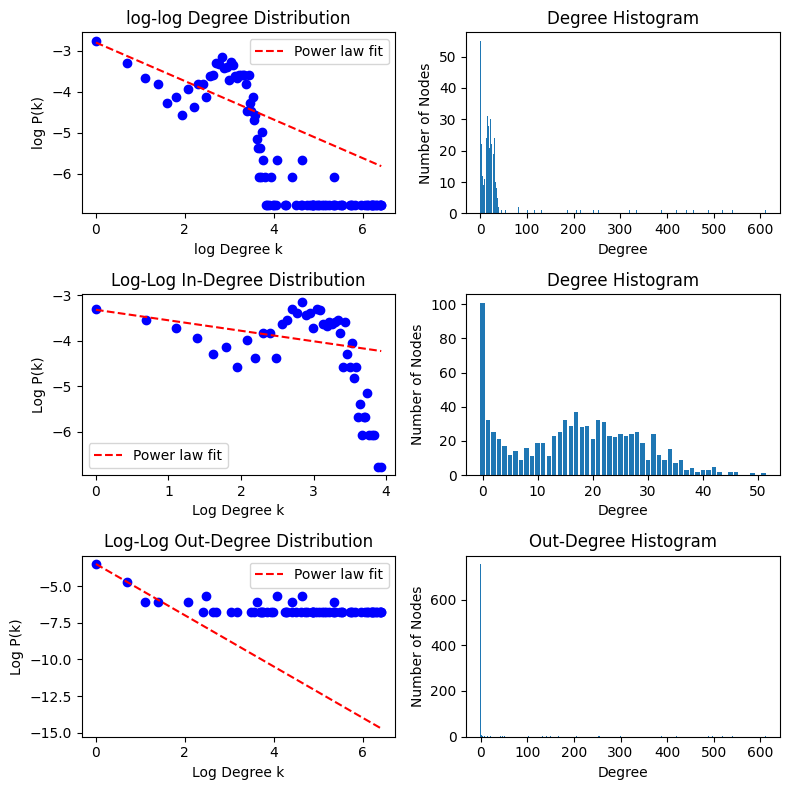

Fitted power law parameters: a = 0.03, b = -1.75


{'avg_clustering': 0.016035848109490807,
 'avg_degree': 33.03114186851211,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  45,  46,  47,  49,  51,  54,  55,  57,  59,
         70,  71,  82,  89, 101, 102, 103, 116, 124, 130, 131, 132, 133,
        141, 148, 150, 162, 167, 177, 187, 206, 209, 211, 215, 243, 253,
        255, 300, 310, 320, 335, 388, 420, 442, 457, 489, 497, 500, 509,
        519, 540, 558, 591, 599, 603, 611]),
 'density': 0.01907109807650815,
 'degree_proba': array([0.06343714, 0.03690888, 0.02537486, 0.02191465, 0.01384083,
        0.01614764, 0.01038062, 0.01960784, 0.01268743, 0.02191465,
        0.02191465, 0.01614764, 0.02652826, 0.02768166, 0.03690888,
        0.03575548, 0.04267589, 0.03229527, 0.03344867, 0.02422145,
        0.03806228, 0.03460208, 0.026

In [18]:
g_largest_dmelanogaster = f.get_largest_cc(g_dmelanogaster)
f.plot_degrees(g_largest_dmelanogaster, plot_fit=True)
properties_largest_dmelanogaster = gg.network_properties(g_largest_dmelanogaster)
properties_largest_dmelanogaster

## Escherichia Coli

### Full network

Fitted power law parameter: b = -2.02


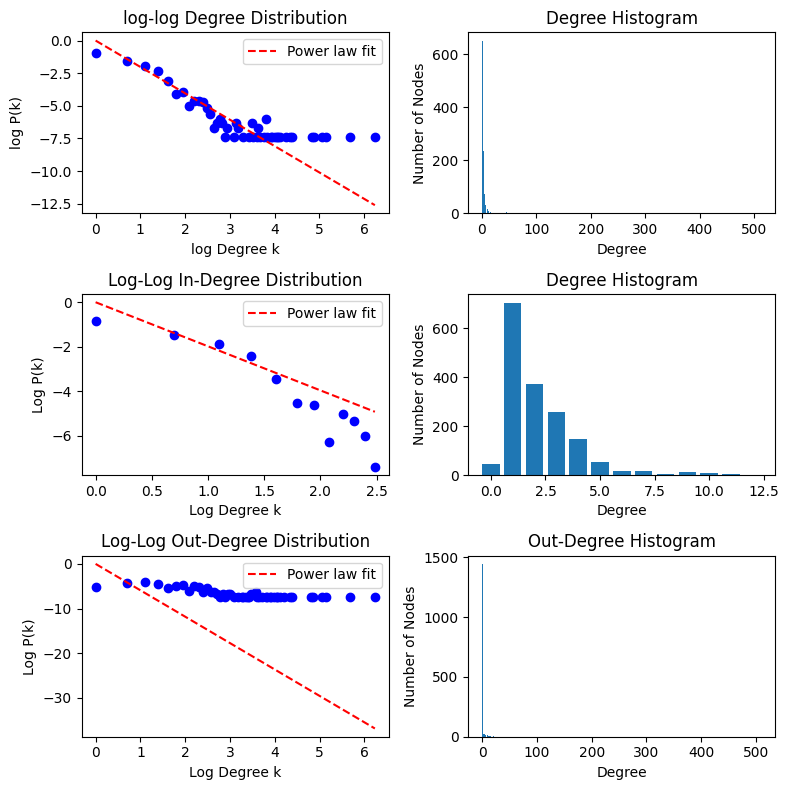

{'avg_clustering': 0.12683262146811017,
 'avg_degree': 4.3341463414634145,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  22,  23,  24,  27,  31,  33,  34,
         37,  38,  39,  43,  45,  46,  50,  52,  55,  58,  59,  62,  70,
         77,  80, 125, 132, 157, 173, 296, 513]),
 'density': 0.0013221922945281924,
 'degree_proba': array([0.39634146, 0.20792683, 0.14390244, 0.09634146, 0.04390244,
        0.01646341, 0.01890244, 0.00670732, 0.0097561 , 0.0097561 ,
        0.00914634, 0.0054878 , 0.00365854, 0.00121951, 0.00182927,
        0.00243902, 0.00182927, 0.00060976, 0.00121951, 0.00060976,
        0.00182927, 0.00121951, 0.00060976, 0.00060976, 0.00182927,
        0.00060976, 0.00060976, 0.00121951, 0.00060976, 0.00060976,
        0.00243902, 0.00060976, 0.00060976, 0.00060976, 0.00060976,
        0.00060976, 0.00060976, 0.00060976, 0.00060976, 0.00060976,
        0.00060976, 0.00060976, 0.00060976, 0.0006

In [4]:
f.plot_degrees(g_ecoli, plot_fit=True)
properties_ecoli

### Largest component

Fitted power law parameter: b = -1.97


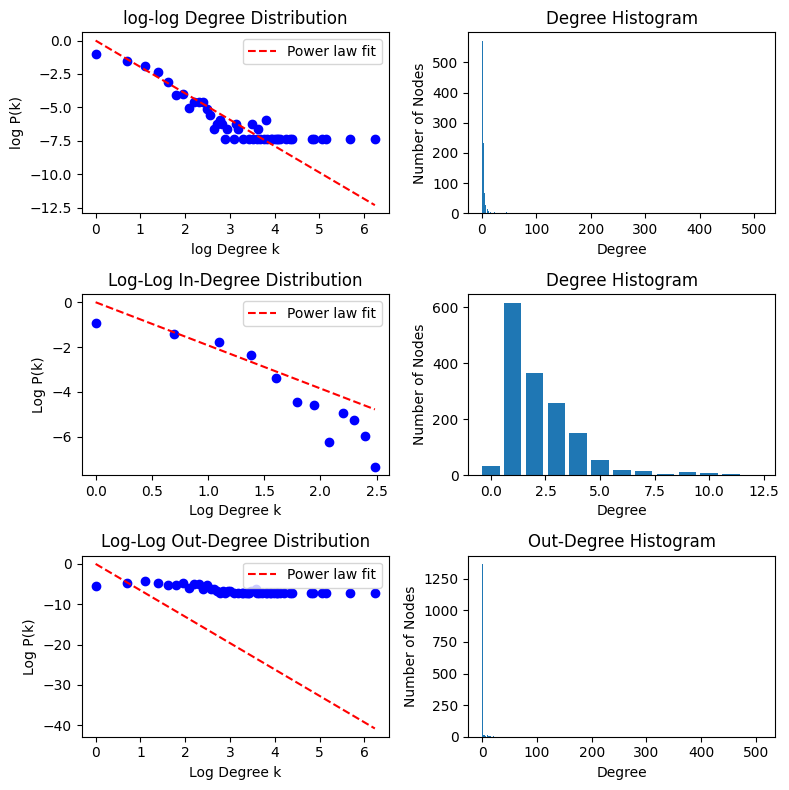

{'avg_clustering': 0.13446834151938689,
 'avg_degree': 4.506527415143603,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  22,  23,  24,  27,  31,  33,  34,
         37,  38,  39,  43,  45,  46,  50,  52,  55,  58,  59,  62,  70,
         77,  80, 125, 132, 157, 173, 296, 513]),
 'density': 0.0014717594432212943,
 'degree_proba': array([0.3727154 , 0.21932115, 0.15208877, 0.09530026, 0.04438642,
        0.01762402, 0.01827676, 0.00652742, 0.00979112, 0.01044386,
        0.00979112, 0.00587467, 0.00391645, 0.00130548, 0.00195822,
        0.00261097, 0.00195822, 0.00065274, 0.00130548, 0.00065274,
        0.00195822, 0.00130548, 0.00065274, 0.00065274, 0.00195822,
        0.00065274, 0.00065274, 0.00130548, 0.00065274, 0.00065274,
        0.00261097, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065

In [5]:
g_largest_ecoli = f.get_largest_cc(g_ecoli)
f.plot_degrees(g_largest_ecoli, plot_fit=True)
properties_largest_ecoli = gg.network_properties(g_largest_ecoli)
properties_largest_ecoli

## Homo Sapiens

### Full network

Fitted power law parameter: b = -1.85


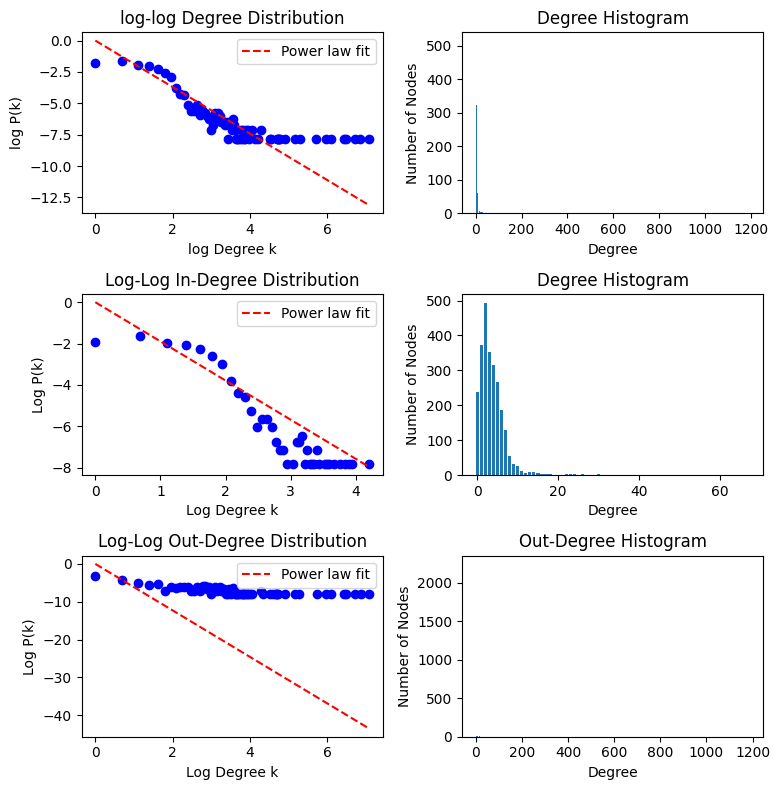

{'avg_clustering': 0.11254306246828757,
 'avg_degree': 7.5371316306483305,
 'degrees': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   34,
          35,   36,   37,   38,   39,   40,   42,   43,   44,   46,   47,
          48,   49,   52,   54,   57,   63,   67,   72,   92,   94,  110,
         113,  114,  116,  118,  134,  176,  200,  306,  390,  448,  617,
         651,  830,  956, 1193]),
 'density': 0.0014813544871557253,
 'degree_proba': array([0.17131631, 0.20235756, 0.14145383, 0.12730845, 0.10569745,
        0.07308448, 0.05304519, 0.02357564, 0.01453831, 0.01257367,
        0.00589391, 0.00353635, 0.00353635, 0.00589391, 0.00275049,
        0.00392927, 0.00314342, 0.00235756, 0.00196464, 0.00078585,
        0.00117878, 0.00314342, 0.00196464, 0.00314342, 0.00235756,
        0.00157171, 0.00157171, 0.00157171, 0

In [6]:
f.plot_degrees(g_hsapiens, plot_fit=True)
properties_hsapiens

### Largest Component

Fitted power law parameter: b = -1.85


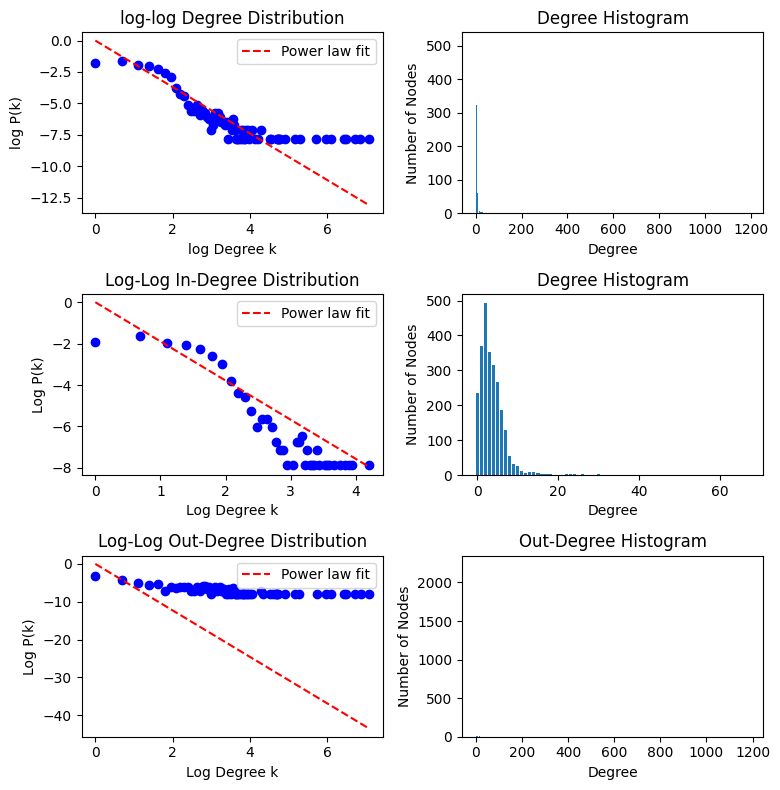

{'avg_clustering': 0.11280901692863012,
 'avg_degree': 7.552579755809374,
 'degrees': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   34,
          35,   36,   37,   38,   39,   40,   42,   43,   44,   46,   47,
          48,   49,   52,   54,   57,   63,   67,   72,   92,   94,  110,
         113,  114,  116,  118,  134,  176,  200,  306,  390,  448,  617,
         651,  830,  956, 1193]),
 'density': 0.0014878998730908932,
 'degree_proba': array([0.16935801, 0.20283576, 0.14178811, 0.12760929, 0.10594722,
        0.07325719, 0.05317054, 0.02363135, 0.01457267, 0.01260339,
        0.00590784, 0.0035447 , 0.0035447 , 0.00590784, 0.00275699,
        0.00393856, 0.00315085, 0.00236314, 0.00196928, 0.00078771,
        0.00118157, 0.00315085, 0.00196928, 0.00315085, 0.00236314,
        0.00157542, 0.00157542, 0.00157542, 0.

In [7]:
g_largest_hsapiens = f.get_largest_cc(g_hsapiens)
f.plot_degrees(g_largest_hsapiens, plot_fit=True)
properties_largest_hsapiens = gg.network_properties(g_largest_hsapiens)
properties_largest_hsapiens

## Saccharomyces Cerevisiae

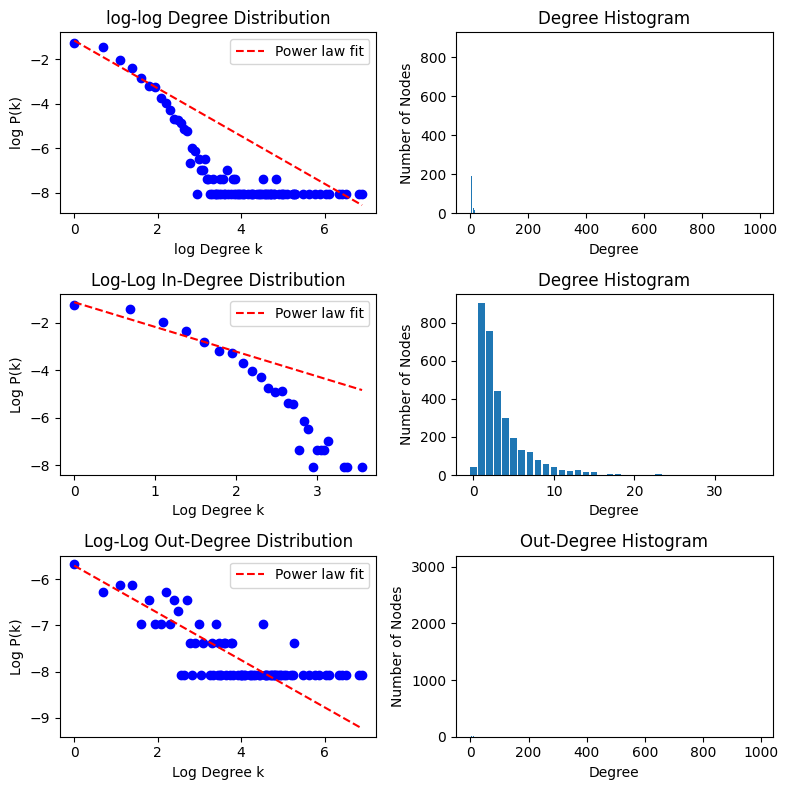

Fitted power law parameters: a = 0.00, b = -0.51


{'avg_clustering': 0.17515575541285128,
 'avg_degree': 6.859918520839862,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,
         43,  45,  46,  47,  48,  51,  52,  55,  57,  59,  65,  69,  71,
         72,  80,  84,  86,  90,  93,  96,  97, 101, 103, 108, 111, 112,
        119, 121, 125, 135, 144, 147, 153, 164, 188, 189, 198, 199, 242,
        280, 324, 359, 416, 447, 566, 608, 683, 930, 992]),
 'density': 0.0010752223386896337,
 'degree_proba': array([0.27702914, 0.23190223, 0.13162018, 0.09119398, 0.05954246,
        0.04136634, 0.03823253, 0.02381699, 0.01911626, 0.01410216,
        0.00908806, 0.00877468, 0.00783453, 0.00595425, 0.00532748,
        0.00125353, 0.00250705, 0.00219367, 0.00031338, 0.00156691,
        0.00094014, 0.00094014, 0.00156691, 0.00062676, 0.00062676,
        0.00031338, 0.0003

In [23]:
f.plot_degrees(g_scerevisiae, plot_fit=True)
properties_scerevisiae

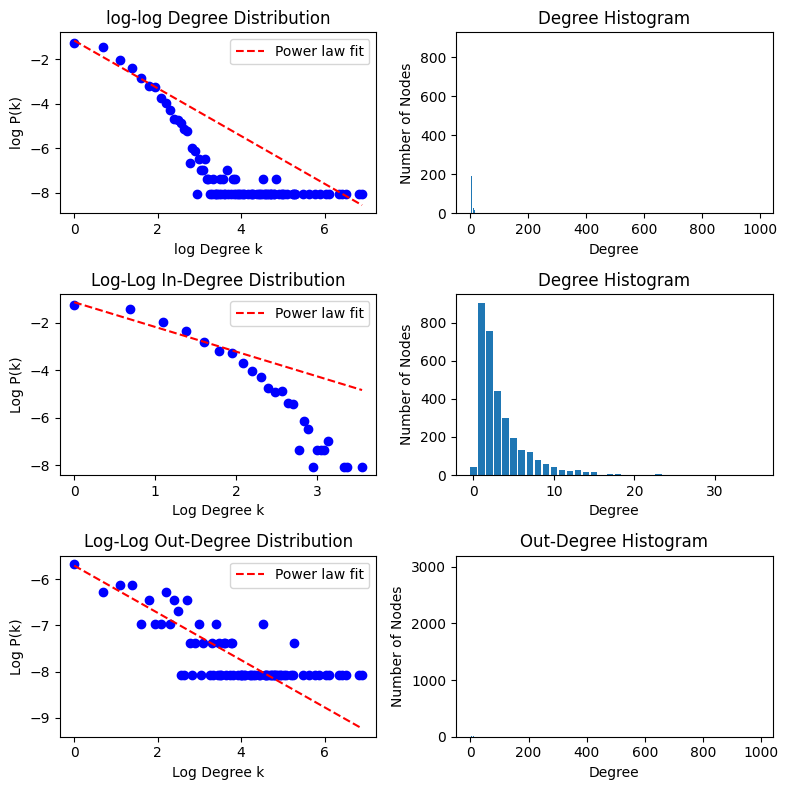

Fitted power law parameters: a = 0.00, b = -0.51


{'avg_clustering': 0.17515575541285128,
 'avg_degree': 6.859918520839862,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,
         43,  45,  46,  47,  48,  51,  52,  55,  57,  59,  65,  69,  71,
         72,  80,  84,  86,  90,  93,  96,  97, 101, 103, 108, 111, 112,
        119, 121, 125, 135, 144, 147, 153, 164, 188, 189, 198, 199, 242,
        280, 324, 359, 416, 447, 566, 608, 683, 930, 992]),
 'density': 0.0010752223386896337,
 'degree_proba': array([0.27702914, 0.23190223, 0.13162018, 0.09119398, 0.05954246,
        0.04136634, 0.03823253, 0.02381699, 0.01911626, 0.01410216,
        0.00908806, 0.00877468, 0.00783453, 0.00595425, 0.00532748,
        0.00125353, 0.00250705, 0.00219367, 0.00031338, 0.00156691,
        0.00094014, 0.00094014, 0.00156691, 0.00062676, 0.00062676,
        0.00031338, 0.0003

In [24]:
g_largest_scerevisiae = f.get_largest_cc(g_scerevisiae)
f.plot_degrees(g_largest_scerevisiae, plot_fit=True)
properties_largest_scerevisiae = gg.network_properties(g_largest_scerevisiae)
properties_largest_scerevisiae

# Network comparison

# GNW Ecoli VS Homo Sapiens

In [41]:
filepath = '../data/gnw/Ecoli-full.tsv'
adj_mx = gg.adj_mx_gnw_goldstandard(filepath)
ecoli_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph())

# Get the largest weakly connected component
largest_weakly_cc = max(nx.weakly_connected_components(ecoli_grn), key=len)

# Create the subgraph
ecoli_largest = ecoli_grn.subgraph(largest_weakly_cc).copy()
largest_gnw_properties = gg.network_properties(ecoli_largest)

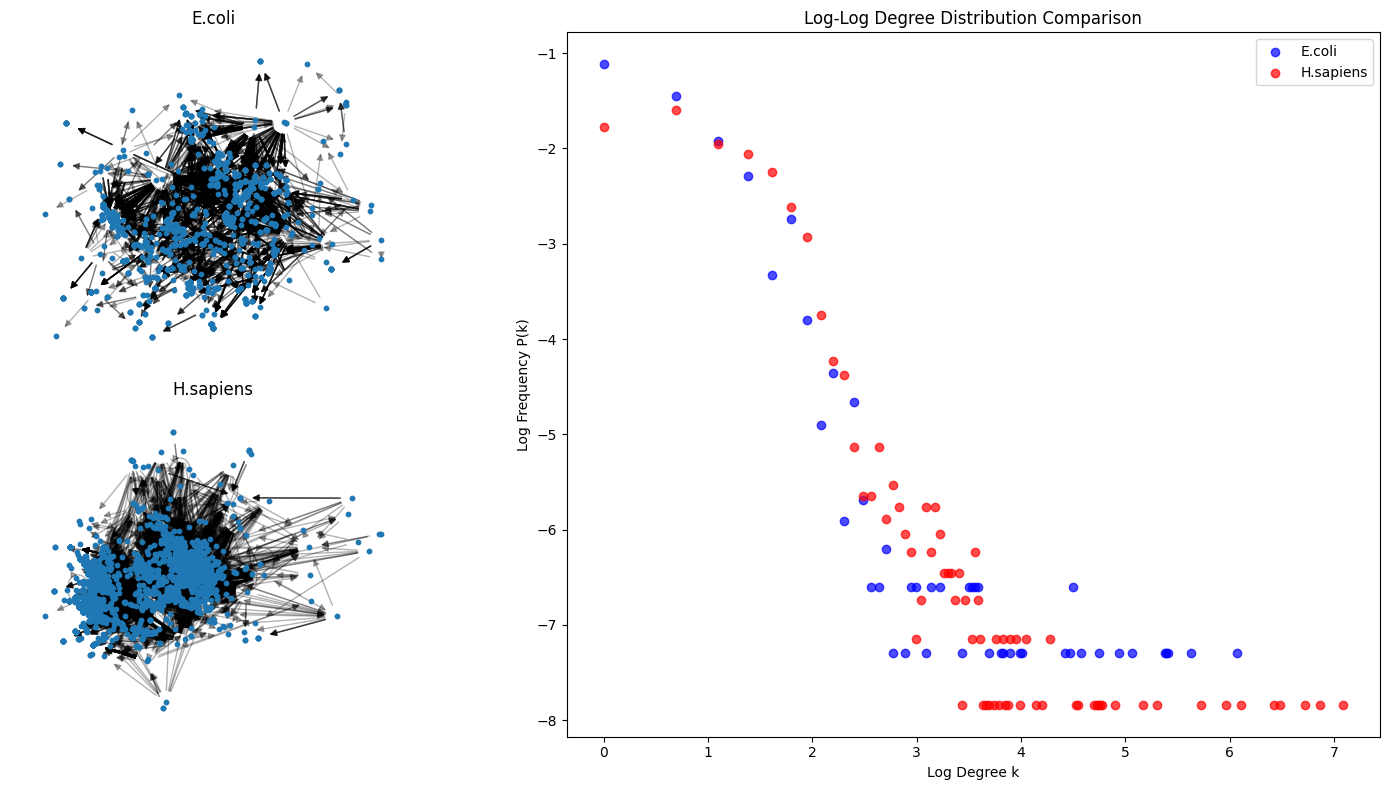

In [43]:
gg.plot_degree_network(ecoli_largest,human_largest, 'E.coli', 'H.sapiens')

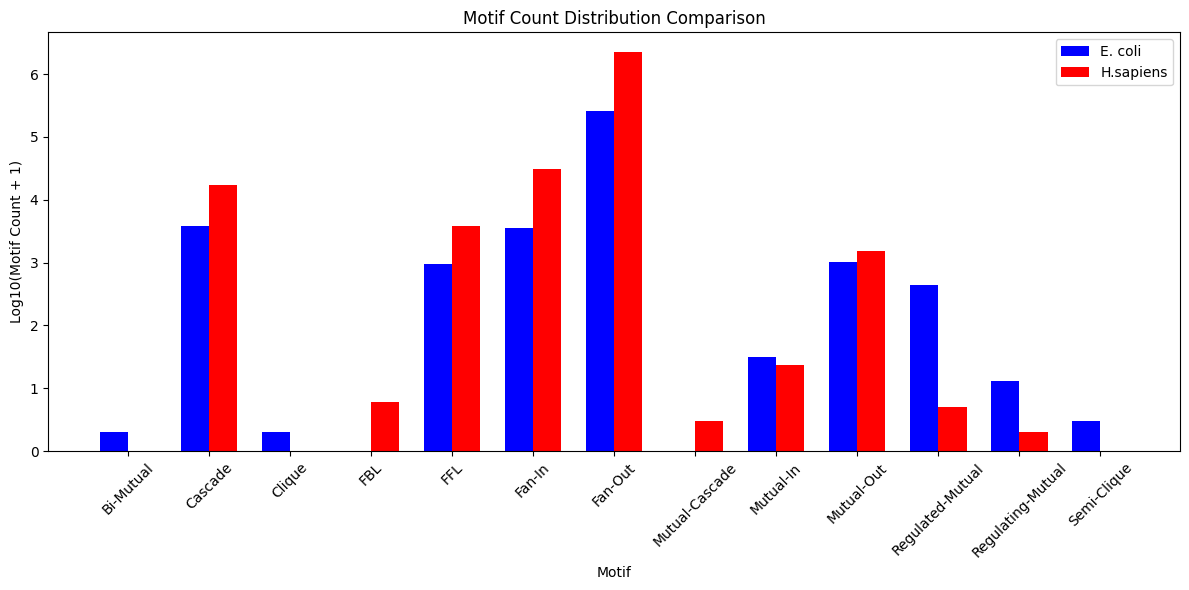

In [56]:
gg.compare_motif_dist(ecoli_largest, human_largest, "E. coli", "H.sapiens")#, save_filename='motif_distribution.eps')

# Paper E Coli VS Homo Sapiens

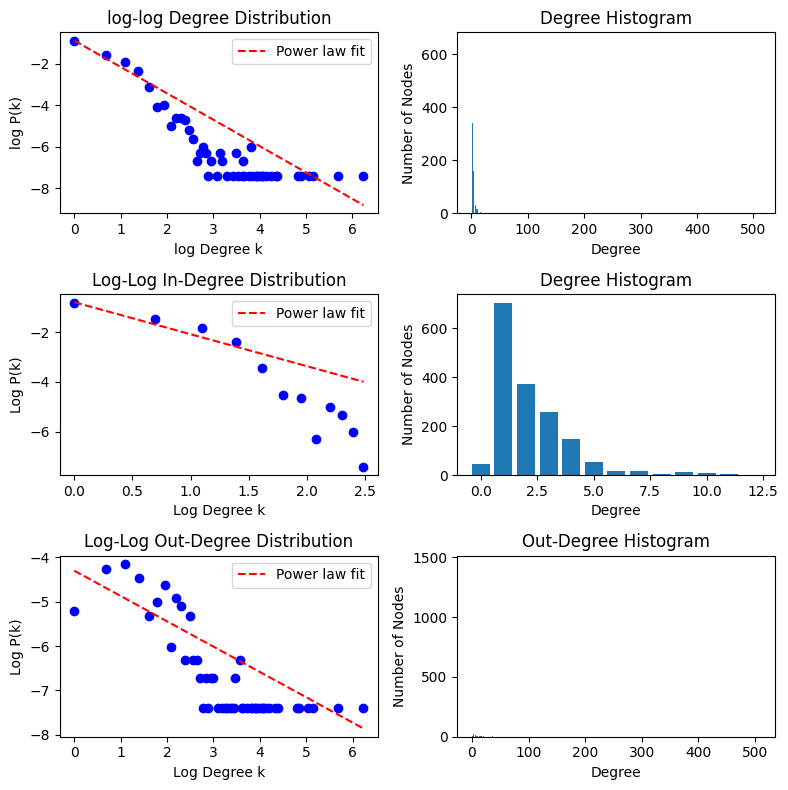

Fitted power law parameters: a = 0.01, b = -0.57


{'avg_clustering': 0.12683262146811017,
 'avg_degree': 4.3341463414634145,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  22,  23,  24,  27,  31,  33,  34,
         37,  38,  39,  43,  45,  46,  50,  52,  55,  58,  59,  62,  70,
         77,  80, 125, 132, 157, 173, 296, 513]),
 'density': 0.0013221922945281924,
 'degree_proba': array([0.39634146, 0.20792683, 0.14390244, 0.09634146, 0.04390244,
        0.01646341, 0.01890244, 0.00670732, 0.0097561 , 0.0097561 ,
        0.00914634, 0.0054878 , 0.00365854, 0.00121951, 0.00182927,
        0.00243902, 0.00182927, 0.00060976, 0.00121951, 0.00060976,
        0.00182927, 0.00121951, 0.00060976, 0.00060976, 0.00182927,
        0.00060976, 0.00060976, 0.00121951, 0.00060976, 0.00060976,
        0.00243902, 0.00060976, 0.00060976, 0.00060976, 0.00060976,
        0.00060976, 0.00060976, 0.00060976, 0.00060976, 0.00060976,
        0.00060976, 0.00060976, 0.00060976, 0.0006

In [44]:
g_ecoli = create_graph(escherichniaColi)
ecoli_properties = gg.network_properties(g_ecoli)
plot_degrees(g_ecoli, plot_fit=True)
ecoli_properties

In [52]:
# Get the largest weakly connected component
largest_ecoli_paper_weakly_cc = max(nx.weakly_connected_components(g_ecoli), key=len)
ecoli_paper_largest = g_ecoli.subgraph(largest_ecoli_paper_weakly_cc).copy()

In [57]:
ecoli_paper_largest_properties = gg.network_properties(ecoli_paper_largest)

In [58]:
ecoli_paper_largest_properties

{'avg_clustering': 0.13446834151938689,
 'avg_degree': 4.506527415143603,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  22,  23,  24,  27,  31,  33,  34,
         37,  38,  39,  43,  45,  46,  50,  52,  55,  58,  59,  62,  70,
         77,  80, 125, 132, 157, 173, 296, 513]),
 'density': 0.0014717594432212943,
 'degree_proba': array([0.3727154 , 0.21932115, 0.15208877, 0.09530026, 0.04438642,
        0.01762402, 0.01827676, 0.00652742, 0.00979112, 0.01044386,
        0.00979112, 0.00587467, 0.00391645, 0.00130548, 0.00195822,
        0.00261097, 0.00195822, 0.00065274, 0.00130548, 0.00065274,
        0.00195822, 0.00130548, 0.00065274, 0.00065274, 0.00195822,
        0.00065274, 0.00065274, 0.00130548, 0.00065274, 0.00065274,
        0.00261097, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065

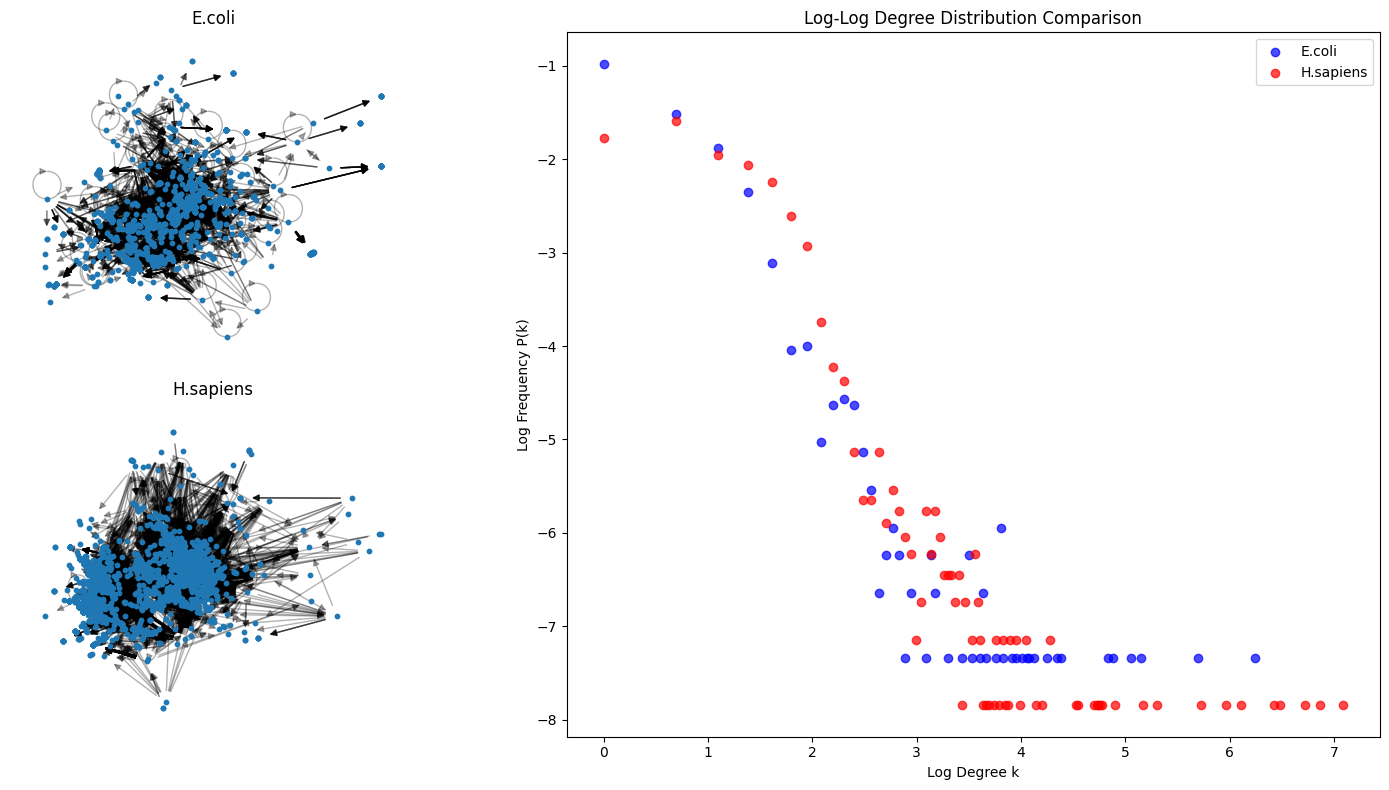

In [55]:
gg.plot_degree_network(ecoli_paper_largest,human_largest, 'E.coli', 'H.sapiens')